In [5]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('data/train.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1100 non-null   int64 
 1   Age                       1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

In [3]:
data.describe()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.161818,36.999091,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,0.368451,9.037230,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


- 都是数值, 取值少的实际还是类别, 比如 Education  1,2,3,4,5 5个类别
- 取值多的比如 Age年龄  连续数值 

- 二分类问题, 目标值是类别, 特征值是连续多值数值型, 两种方式 画图 KDE  单特征AUC

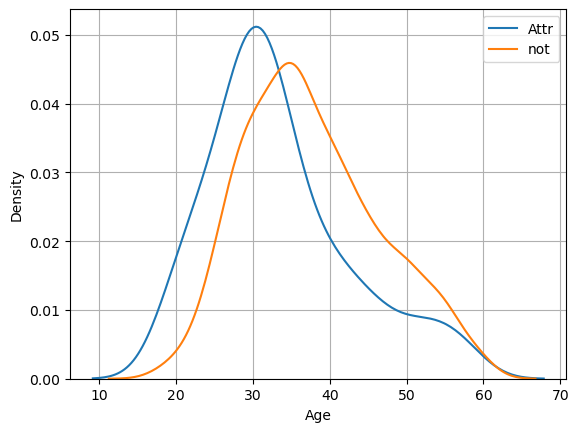

In [13]:
import matplotlib.pyplot as plt
sns.kdeplot(data = data[data['Attrition']==1], x='Age',label = 'Attr')
sns.kdeplot(data = data[data['Attrition']==0], x='Age',label = 'not')
plt.grid(True)
plt.legend(loc='best')

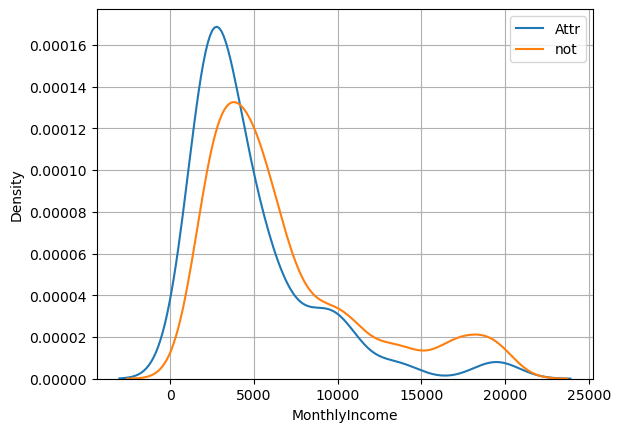

In [14]:
import matplotlib.pyplot as plt
sns.kdeplot(data = data[data['Attrition']==1], x='MonthlyIncome',label = 'Attr')
sns.kdeplot(data = data[data['Attrition']==0], x='MonthlyIncome',label = 'not')
plt.grid(True)
plt.legend(loc='best')

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(data['Attrition'],data['Age'])

0.351735967242682

In [16]:
roc_auc_score(data['Attrition'],data['MonthlyIncome'])

0.3448505934826586

In [17]:
0.5-roc_auc_score(data['Attrition'],data['MonthlyIncome'])

0.15514940651734138

- 类别型

In [18]:
data.groupby('Education')['Attrition'].mean()

Education
1    0.214286
2    0.145631
3    0.167053
4    0.156146
5    0.055556
Name: Attrition, dtype: float64

In [19]:
roc_auc_score(data['Attrition'],data['Education'])

0.47068841551098006

In [20]:
data.groupby('JobInvolvement')['Attrition'].mean()

JobInvolvement
1    0.380952
2    0.168498
3    0.146747
4    0.106796
Name: Attrition, dtype: float64

In [21]:
roc_auc_score(data['Attrition'],data['JobInvolvement'])

0.42820322211118966

In [ ]:
# 所有特征按照这个套路遍历一圈, 可以找出有区分度的特征, 0.5附近 0.48 0.52 直接删除了
# 先跑一个baseline 

- 进一步提升效果
 - 类别的可以进行编码
    - 用离职率来编码
    - woe p_good/p_bad   P_没离职/P_离职  toad
 - 数值型 分箱/编码
    - 卡方分箱 WOE变换
    - 自己做分箱尝试 /决策树 
 - 调整了一个特征就可以跑一下模型和baseline做比较

In [25]:
roc_auc_score(data['Attrition'],data['Education'])

0.47068841551098006

In [27]:
0.5-roc_auc_score(data['Attrition'],data['Education'])

0.029311584489019937

In [26]:
edu_encoding_dict = data.groupby('Education')['Attrition'].mean().to_dict()
roc_auc_score(data['Attrition'],data['Education'].replace(edu_encoding_dict))

0.5448737478368959

In [7]:
data['Age'].value_counts()

35    59
29    55
36    55
34    53
31    48
30    48
32    47
40    47
33    47
38    39
27    38
37    37
28    35
42    34
41    31
26    31
45    30
39    30
46    25
43    25
50    23
44    22
49    22
25    20
24    18
55    17
51    16
47    16
54    15
56    13
53    13
48    13
22    12
52    12
23    10
19     8
59     8
58     7
21     7
20     6
60     4
18     2
57     2
Name: Age, dtype: int64

- 还想进一步提升
    - 尝试造新的特征 总工龄/在几家公司任职
    - SMOTE过采样
    - 数据清洗 孤立森林